In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
from sklearn import feature_extraction
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Libraries for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#Libraries for formattting and handling text 
import string 
import re

#Library for nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS


#Library for Splitting Dataset
from sklearn.model_selection import train_test_split


#Libraries for NN
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout

from tensorflow.keras.utils import plot_model

#Library for evaluation
from sklearn import metrics
from functools import reduce
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")


2024-07-14 16:03:21.700096: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-14 16:03:21.700219: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-14 16:03:21.705965: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [10]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'

In [67]:
# #!pip install --upgrade transformers
# import transformers
# print(transformers.__version__)

In [17]:
from transformers import pipeline

summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [18]:
import random
import numpy as np
from tqdm import tqdm_notebook as tqdm
import time
import logging
from sklearn.model_selection import StratifiedKFold
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import (DataLoader, RandomSampler, SequentialSampler,
                              TensorDataset)
from sklearn.metrics import accuracy_score, f1_score

#from transformers import *

In [19]:
from collections import Counter

In [20]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegressionCV
#from sklearn.pipeline import make
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import re
import string
import nltk
from nltk.corpus import stopwords

# XGBoost
import xgboost as xgb
from xgboost import XGBClassifier

# sklearn 
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

It looks like train.csv is badly corrupted...?

In [22]:
train = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

**Exploratory Data Analysis, EDA**

In [23]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [24]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [25]:
train[['keyword', 'location', 'text']].describe()

,keyword,location,text
count,7552,5080,7613
unique,221,3341,7503
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...
freq,45,104,10


In [26]:
train[['keyword', 'location', 'text']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7552 non-null   object
 1   location  5080 non-null   object
 2   text      7613 non-null   object
dtypes: object(3)
memory usage: 178.6+ KB


In [27]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


I seem to find no tweets that unambiguously categorize catastrophes and elsewise.

In [28]:
#train['text'].str.findall('disaster')
#train['text'].str.findall('whalefall')
#train['text'].str.findall('windfall')
#train['text'].str.findall('blessing')
#train['text'].str.findall('catastrophe')
#train['text'].str.findall('calamity')
#train['text'].str.findall('meltdown')
#train['text'].str.findall('bloodbath')
#train['text'].str.findall('godsend')
#train['text'].str.findall('manna')

In [29]:
# hashtag_count
train['hashtag_count'] = train['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
test['hashtag_count'] = test['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
train['mention_count'] = train['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
test['mention_count'] = test['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

#I almost forgot about these...

AttributeError: Rectangle.set() got an unexpected keyword argument 'autopct'

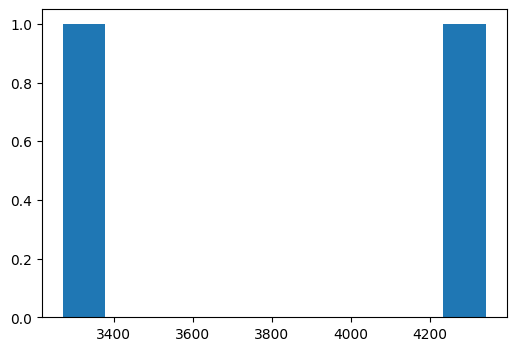

In [30]:
plt.figure(figsize=(6,4))
#plt.hist(train["target"].value_counts(), labels= train["target"].value_counts().keys(),autopct='%1.1f%%')
plt.hist(train["target"].value_counts(),autopct='%1.1f%%')

plt.title('Target values distribution')
plt.show()

In [ ]:
keywords_vc = pd.DataFrame({"Count": train["keyword"].value_counts()})
sns.barplot(y=keywords_vc[0:30].index, x=keywords_vc[0:30]["Count"], orient='h')
plt.title("Top 30 Keywords")
plt.show()
#i think this might be the same as the follow graph...try with 'targe'

<Axes: xlabel='count', ylabel='keyword'>

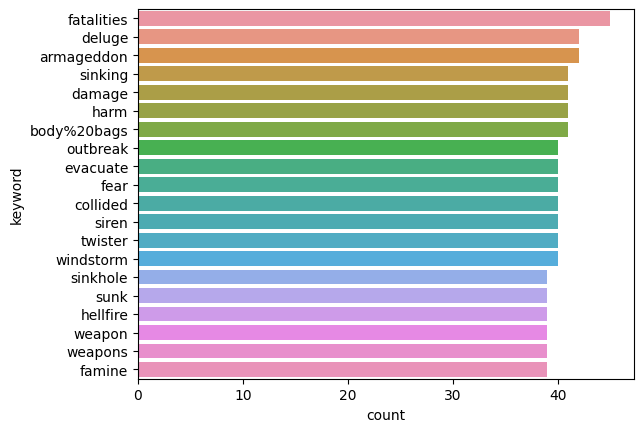

In [69]:
sns.barplot(y=train['keyword'].value_counts()[:20].index,x=train['keyword'].value_counts()[:20],
            orient='h')

The above is just a snippet

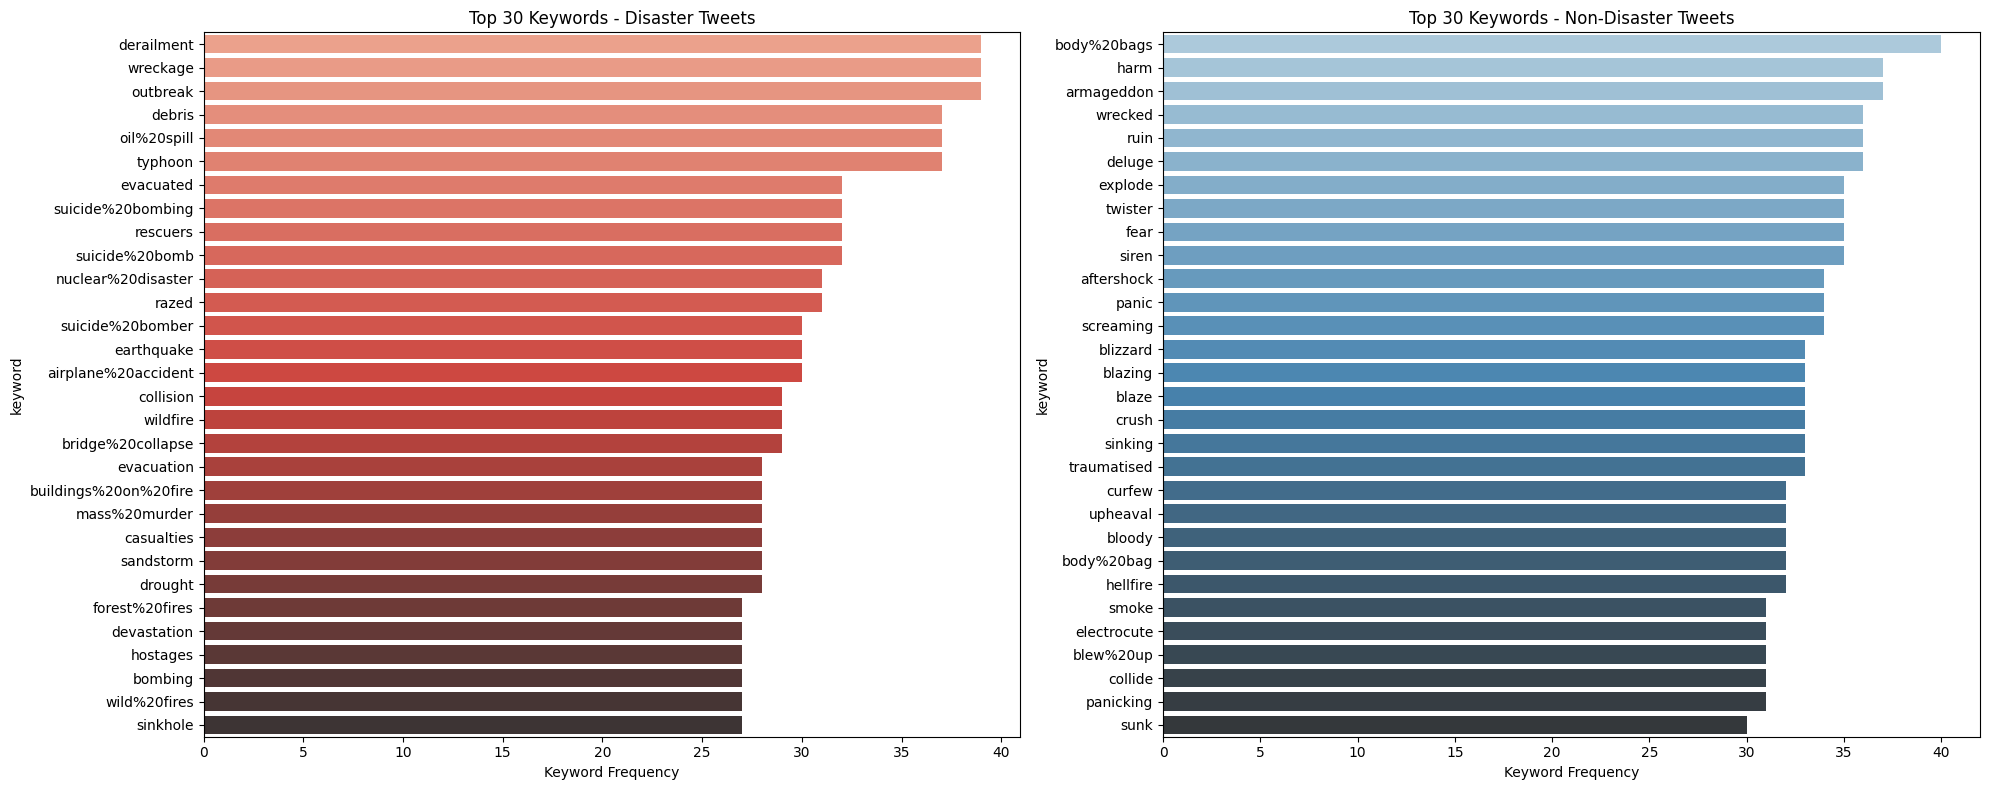

In [70]:
disaster_keywords = train.loc[train["target"] == 1]["keyword"].value_counts()
nondisaster_keywords = train.loc[train["target"] == 0]["keyword"].value_counts()

fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot(y=disaster_keywords[0:30].index, x=disaster_keywords[0:30], orient='h', ax=ax[0], palette="Reds_d")
sns.barplot(y=nondisaster_keywords[0:30].index, x=nondisaster_keywords[0:30], orient='h', ax=ax[1], palette="Blues_d")
ax[0].set_title("Top 30 Keywords - Disaster Tweets")
ax[0].set_xlabel("Keyword Frequency")
ax[1].set_title("Top 30 Keywords - Non-Disaster Tweets")
ax[1].set_xlabel("Keyword Frequency")
plt.tight_layout()
plt.show()

In [71]:
def plot_words_freq(text):
    interim_dataframe = pd.DataFrame(Counter(text).most_common(25), columns= ['Word', 'Frequency'])

    sns.set_context('notebook', font_scale= 1.3)
    plt.figure(figsize=(10,8))
    sns.barplot(y = interim_dataframe['Word'], x= interim_dataframe['Frequency'], palette= 'summer')
    plt.title("Most Commonly Used Words in Real News")
    plt.xlabel("Frequnecy")
    plt.ylabel("Words") 
    return plt.show()

In [72]:
vec = TfidfVectorizer(stop_words="english", analyzer="char", ngram_range=(2,5))

**Data Cleaning**

In [73]:
train['length'] = train['text'].apply(lambda x: len(x))
test['length'] = test['text'].apply(lambda x: len(x))

In [ ]:
# def remove_stopwords(text):
#     ...
#     pass

In [ ]:
#trainv['pos_tags'] = trainv['stopwords_removed'].apply(nltk.tag.pos_tag)
#train['pos_tags'] = train['stopwords_removed'].apply(nltk.tag.pos_tag)

#should i import the clean_text from 

In [55]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [56]:
# Applying the cleaning function to both test and training datasets
train['clean_text'] = train['text'].apply(lambda x: clean_text(x))
test['clean_text'] = test['text'].apply(lambda x: clean_text(x))

# Let's take a look at the updated text
train['text'].head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [39]:
count_vectorizer = feature_extraction.text.CountVectorizer()

## let's get counts for the first 5 tweets in the data
example_train_vectors = count_vectorizer.fit_transform(train["text"][0:5])

In [41]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
train_tfidf = tfidf.fit_transform(train['text'])
test_tfidf = tfidf.transform(test["text"])

In [60]:
max_features = 5000

l =50

learning_rate=2e-3

lstm_out = 100


l =50
max_features=5000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(train['clean_text'].values)
X = tokenizer.texts_to_sequences(train['clean_text'].values)
X = pad_sequences(X, maxlen =l)
tokenizer.fit_on_texts(train['clean_text'].values)
test_token = tokenizer.texts_to_sequences(test['clean_text'].values)
test_token = pad_sequences(test_token, maxlen =l)
embed_dim = 100
lstm_out = 100
model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out, dropout=0.2, return_sequences=True,recurrent_dropout=0.4))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out,dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
adam = optimizers.Adam(learning_rate=2e-3)
model.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [62]:
#plot_model(model) #,to_file='model.png')

es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.fit(X,y, epochs = 4,validation_split = 0.2 ,callbacks=[es_callback], batch_size=32)

Epoch 1/4
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - accuracy: 0.9280 - loss: 0.1839 - val_accuracy: 0.7426 - val_loss: 0.6825
Epoch 2/4
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.9378 - loss: 0.1524 - val_accuracy: 0.7446 - val_loss: 0.7885
Epoch 3/4
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - accuracy: 0.9514 - loss: 0.1326 - val_accuracy: 0.7406 - val_loss: 1.1385
Epoch 4/4
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - accuracy: 0.9584 - loss: 0.1109 - val_accuracy: 0.7262 - val_loss: 1.0739


In [63]:
y_hat = model.predict(test_token).round()

102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step


**Submission**

In [ ]:
sumbmission = y_hat.to_csv('submission_serkan.csv', index=False) 
#tinker, tho... try it with index=True...

In [ ]:
#submission = submission_df.to_csv('submission_serkan.csv',index = False)


**Notes**

NLP seems to me to be one of the hardest forms of data science.

**References**

https://towardsml.com/2019/09/17/bert-explained-a-complete-guide-with-theory-and-tutorial/
https://www.analyticsvidhya.com/blog/2019/09/demystifying-bert-groundbreaking-nlp-framework/
https://towardsdatascience.com/bert-for-dummies-step-by-step-tutorial-fb90890ffe03
https://towardsml.com/2019/09/17/bert-explained-a-complete-guide-with-theory-and-tutorial/
https://www.kaggle.com/code/abhishek/bert-base-uncased-using-pytorch#The-Model
https://www.kaggle.com/code/faressayah/natural-language-processing-nlp-for-beginners
https://www.kaggle.com/code/dikshabhati2002/nlp-for-beginners
https://www.kaggle.com/code/philculliton/nlp-getting-started-tutorial

https://www.kaggle.com/code/abhishek/bert-base-uncased-using-pytorch#The-Model
https://www.kaggle.com/code/sandhyakrishnan02/nlp-with-disaster-tweets-using-lstm